In [1]:
%matplotlib inline

In [9]:
!wget https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv -o ./data/kmeans.csv

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from pathlib import Path 
data_path = Path(".")/'data_1024.csv'
#url = "htt0ps://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv"

In [20]:
df = pd.read_csv(data_path, low_memory=False, sep="\t" , index_col=["Driver_ID"])

In [21]:
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


In [46]:
df.iloc[:,0]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
               ...  
3423310685    160.04
3423312600    176.17
3423312921    170.91
3423313630    176.14
3423311533    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

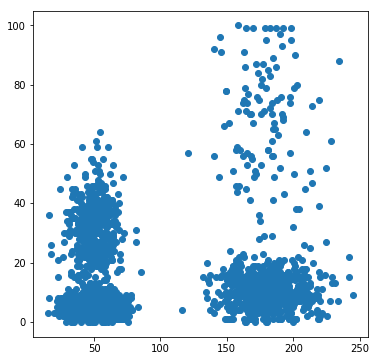

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

In [23]:
X= StandardScaler().fit_transform(df)


In [37]:
X[1]

array([-0.43977285,  1.04174351])

In [36]:
X[0]

array([-0.0898104 ,  1.26061251])

In [24]:
kmeans = KMeans(n_clusters=2).fit(X)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

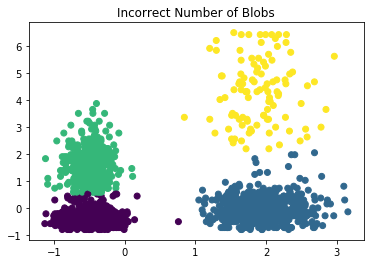

In [48]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [56]:
km.predict(np.array([[-0.432537285,  0.04174351],
                     [-1.432537285,  2.04174351],
                     [-1.432537285,  2.04174351]]))

array([0, 2, 2], dtype=int32)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

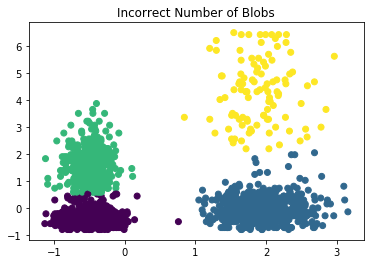

In [30]:
kmeans = KMeans(n_clusters=4).fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

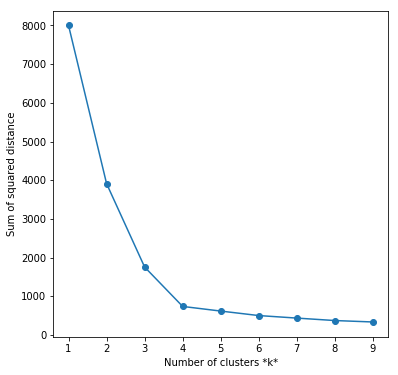

In [29]:
#Elbow 
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

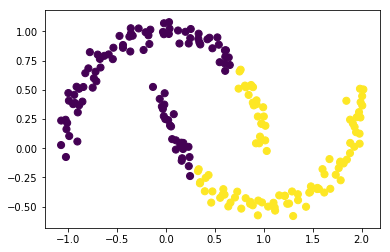

In [5]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/home/nithin/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


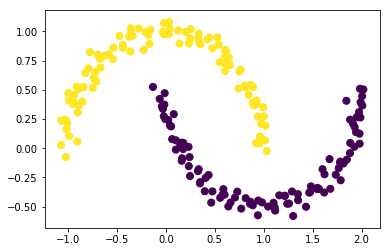

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');